<a href="https://colab.research.google.com/github/allisonlinn/CSUREMM/blob/main/DeTrender_%2B_pearsonr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install google-colab
!pip install sklearn
!pip install statsmodels

from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import grangercausalitytests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
# Upload CSV file from local machine
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

Saving detrended_final (5) - detrended_final (5)-3.csv to detrended_final (5) - detrended_final (5)-3.csv


In [4]:
columns =    ["date", "compound_detrended", "compound",
              "VCDAX_V_detrended", "VCDAX_V_N", "VCSAX_V_detrended",
              "VCSAX_V_N", "VENAX_V_detrended", "VENAX_V_N",
              "VFAIX_V_detrended", "VFAIX_V_N", "VGSLX_V_detrended",
              "VGSLX_V_N", "VGHCX_V_detrended", "VGHCX_V_N",
              "VITAX_V_detrended", "VITAX_V_N", "VMAIX_V_detrended",
              "VSPVX_V_detrended", "VSPVX_V_N", "VTCAX_V_detrended",
              "VTCAX_V_N", "VUIAX_V_detrended", "VUIAX_V_N",
              "VINAX_V_detrended", "VINAX_V_N", "VUIAX_P_detrended",
              "VUIAX_P_N", "VGHCX_P_detrended", "VGHCX_P_N",
              "VFAIX_P_detrended", "VFAIX_P_N", "VSPVX_P_detrended",
              "VSPVX_P_N", "VITAX_P_detrended", "VITAX_P_N",
              "VMAIX_P_detrended", "VGSLX_P_detrended", "VGSLX_P_N",
              "VINAX_P_detrended", "VINAX_P_N", "VTCAX_P_detrended",
              "VTCAX_P_N", "VCSAX_P_detrended", "VCSAX_P_N",
              "VENAX_P_detrended", "VENAX_P_N", "VCDAX_P_detrended",
              "VCDAX_P_N" ]

columns_important_V = ["VCDAX_V_N", "VCSAX_V_N","VENAX_V_N", "VFAIX_V_N",
                       "VGSLX_V_N", "VGHCX_V_N", "VITAX_V_N", "VSPVX_V_N",
                      "VTCAX_V_N", "VUIAX_V_N", "VINAX_V_N"]
columns_important_P = ["VUIAX_P_N", "VGHCX_P_N", "VFAIX_P_N", "VSPVX_P_N",
                       "VITAX_P_N", "VGSLX_P_N","VINAX_P_N", "VTCAX_P_N",
                       "VCSAX_P_N", "VENAX_P_N", "VCDAX_P_N"]
columns_affected_all = columns_important_P + columns_important_V

data = df[columns].dropna()
data["date"] = pd.to_datetime(data["date"])
date = data.set_index('date', inplace = True)

data_affected = data[columns_affected_all]
data_detrended = pd.DataFrame(index=data_affected.index)

In [5]:
def detrend_linear (column):
  x = np.arange(len(column))
  y = column.values.reshape(-1,1)

  regressor = LinearRegression()
  regressor.fit(x.reshape(-1, 1), y)

  trend = regressor.predict(x.reshape(-1,1))
  column_detrended = column - trend.flatten()

  return column_detrended

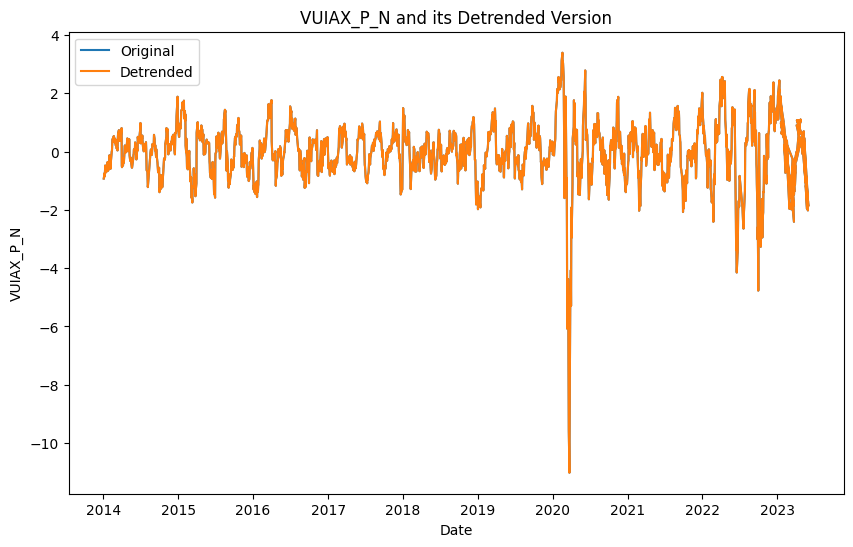

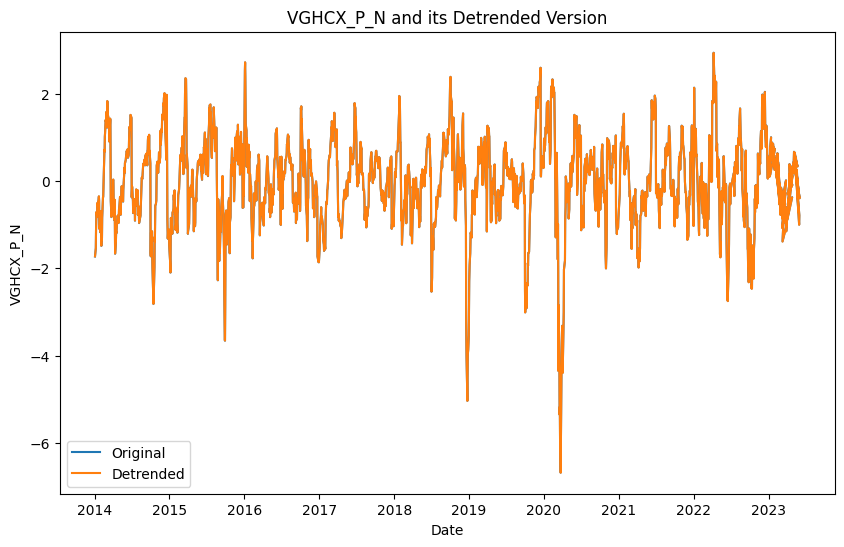

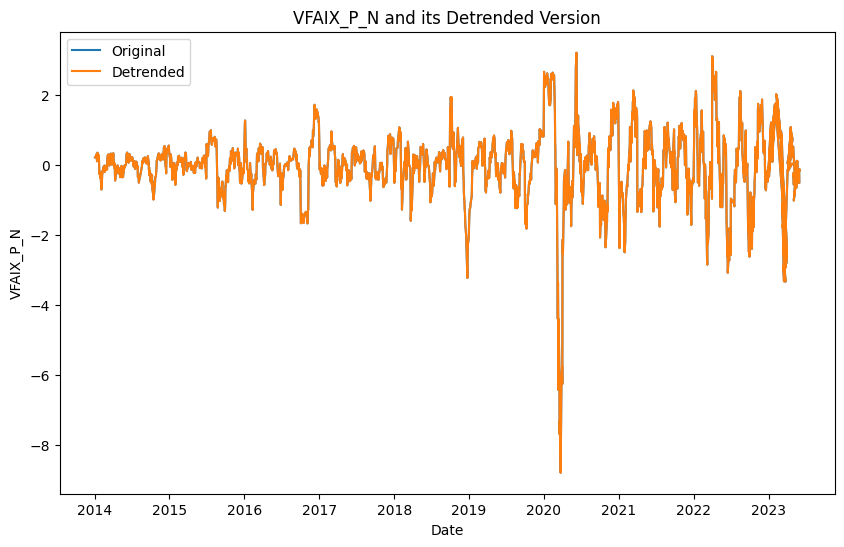

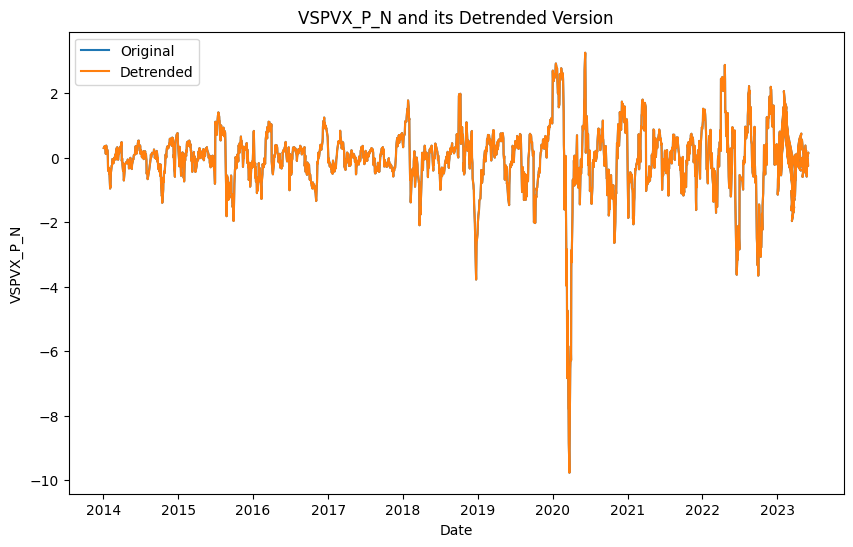

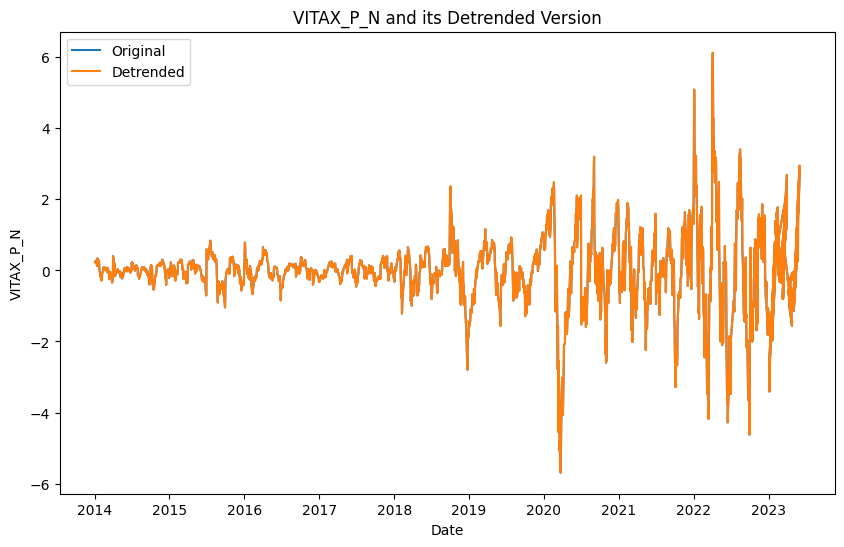

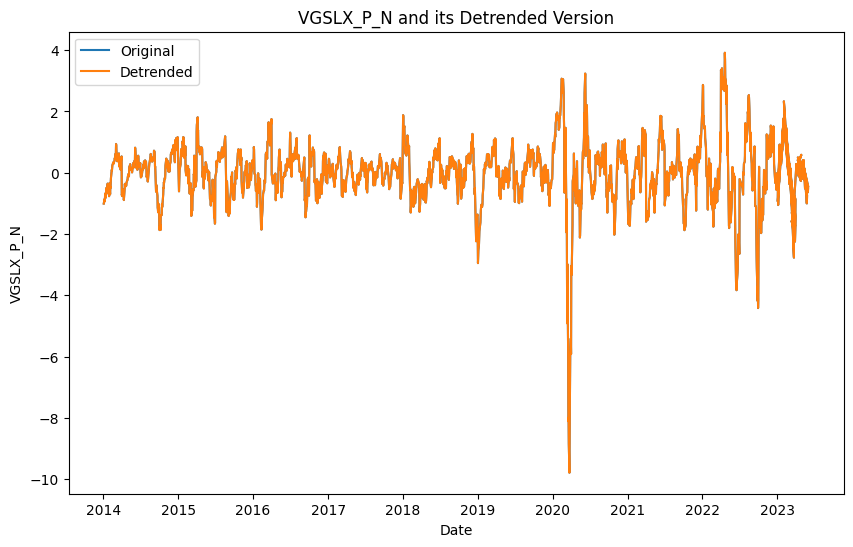

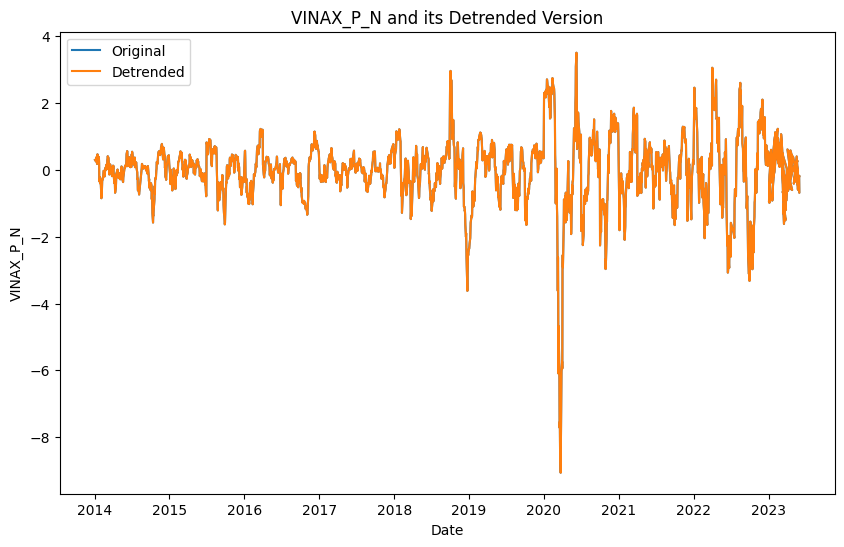

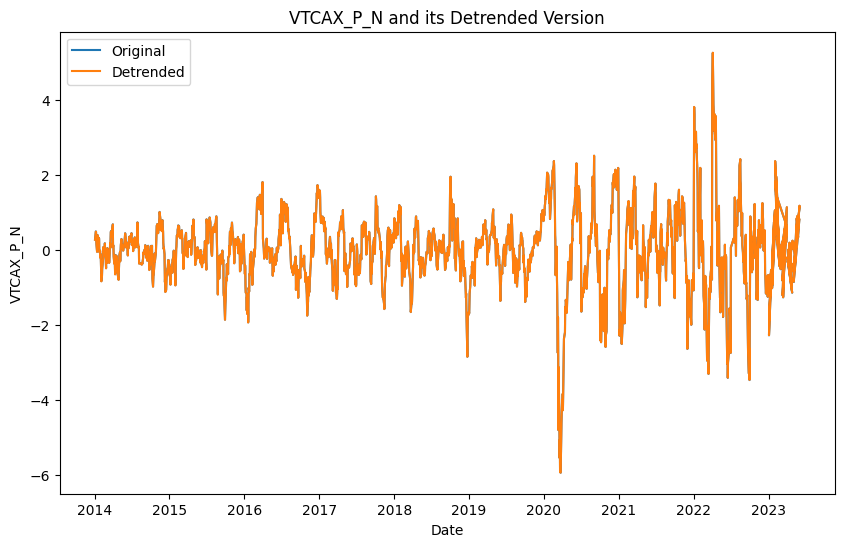

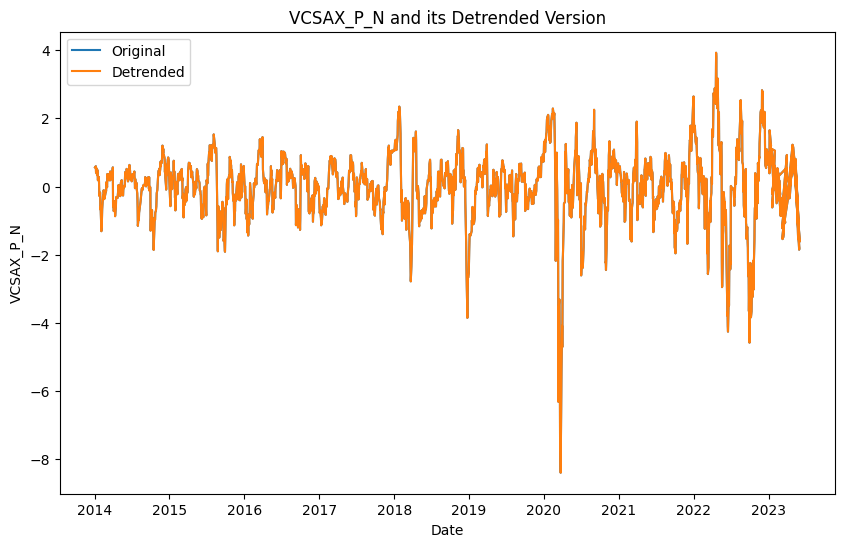

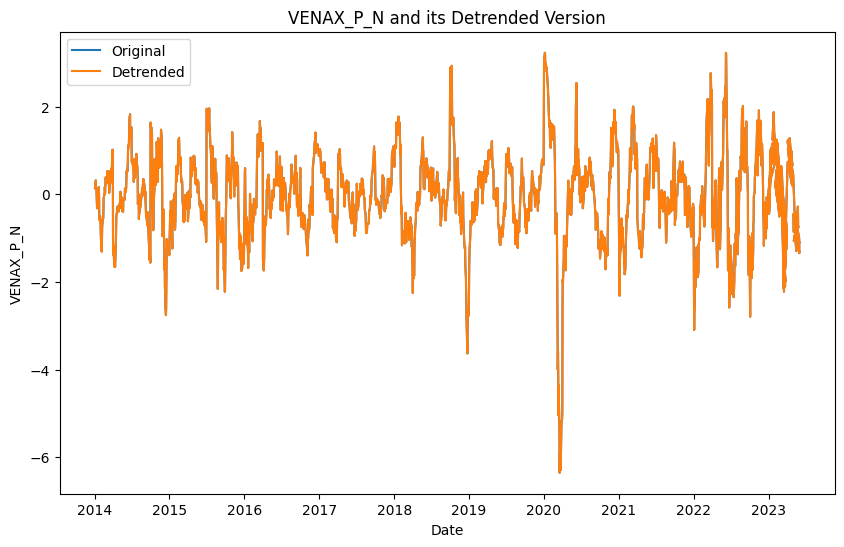

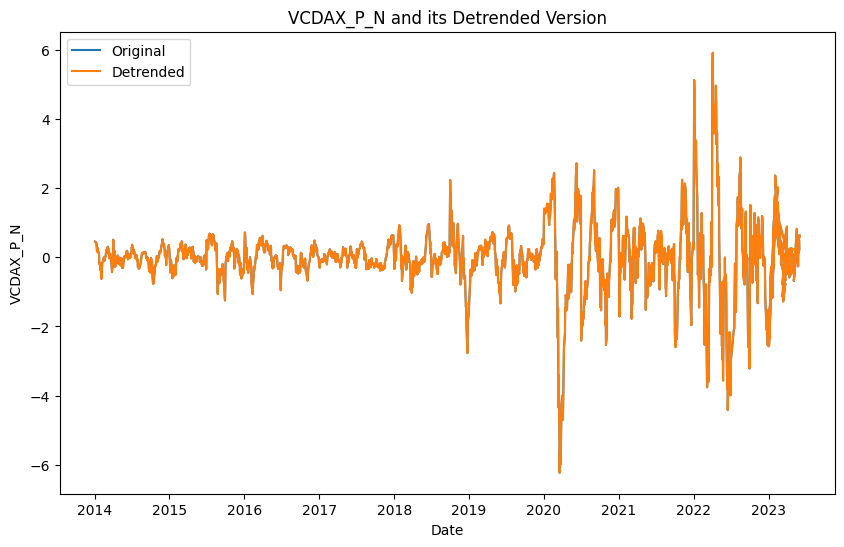

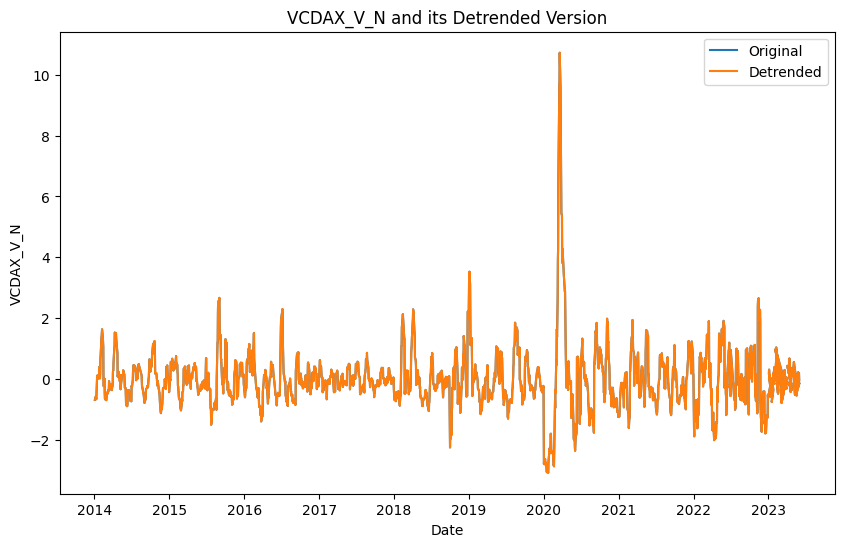

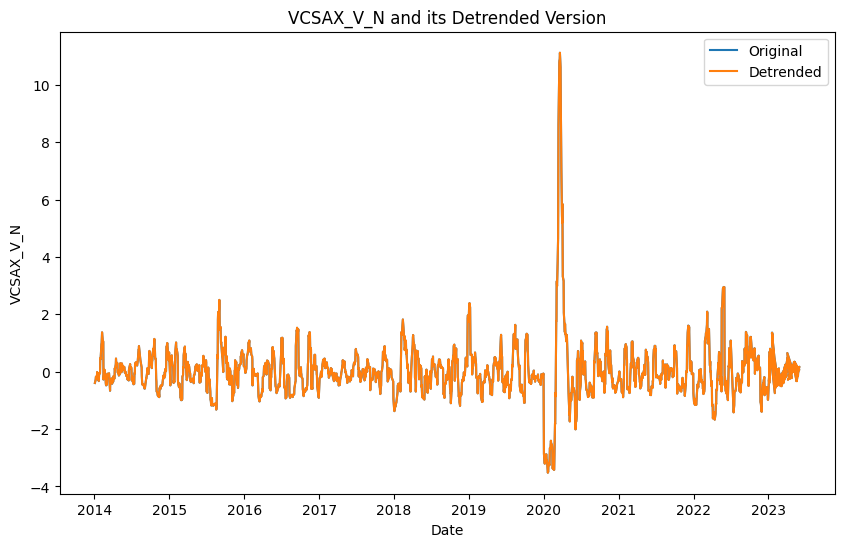

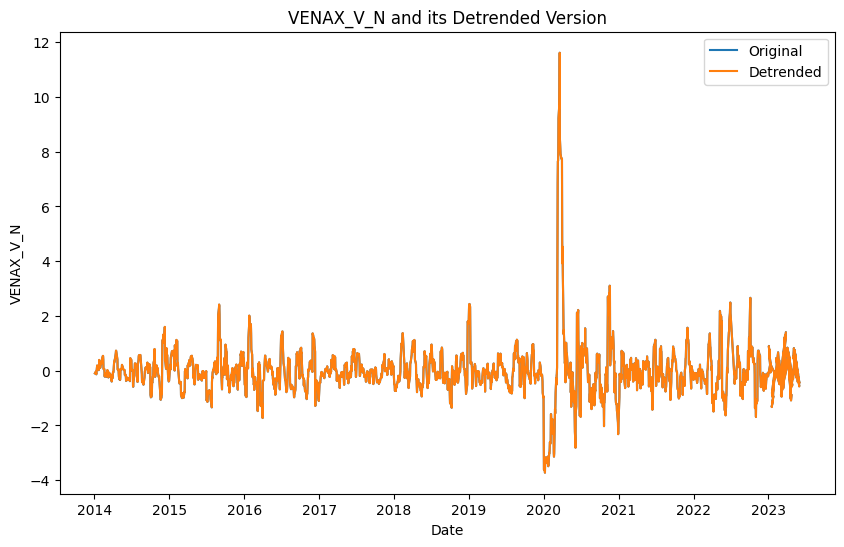

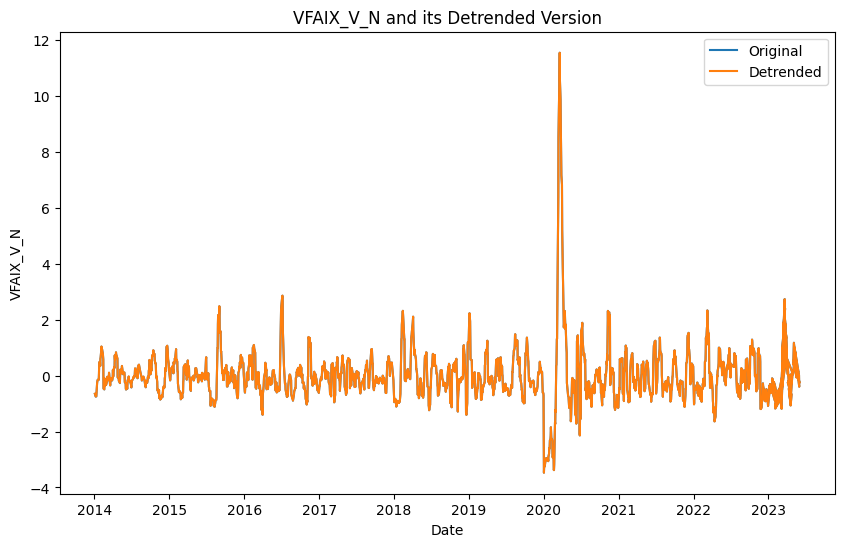

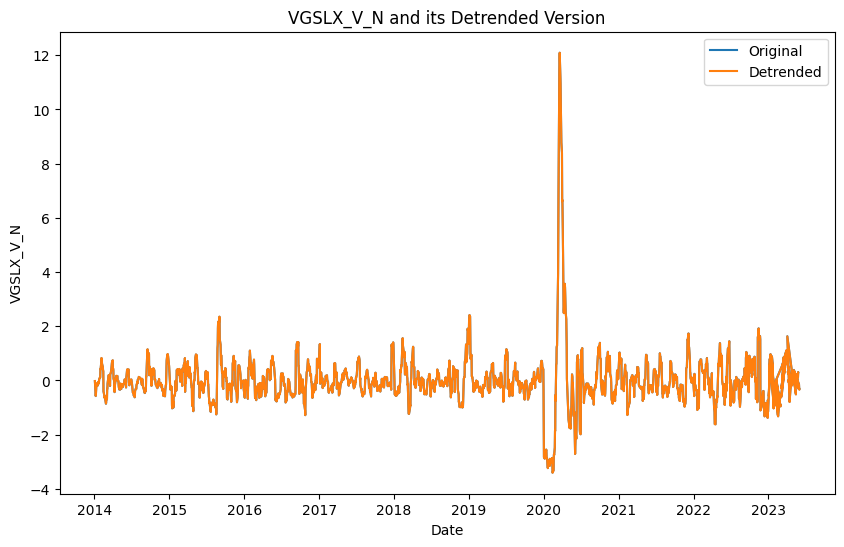

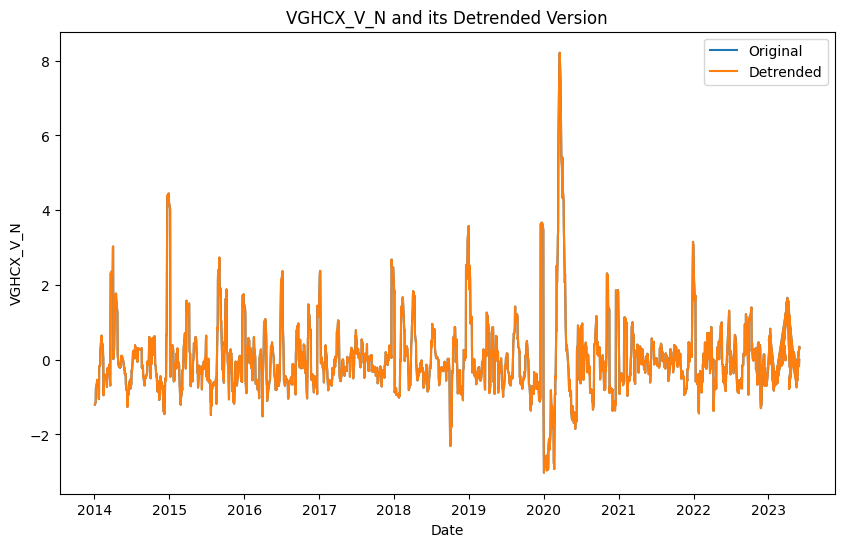

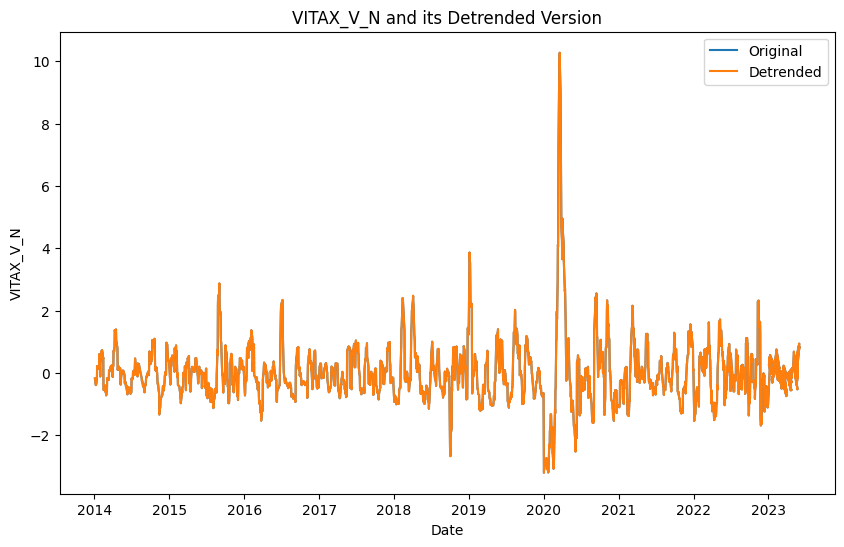

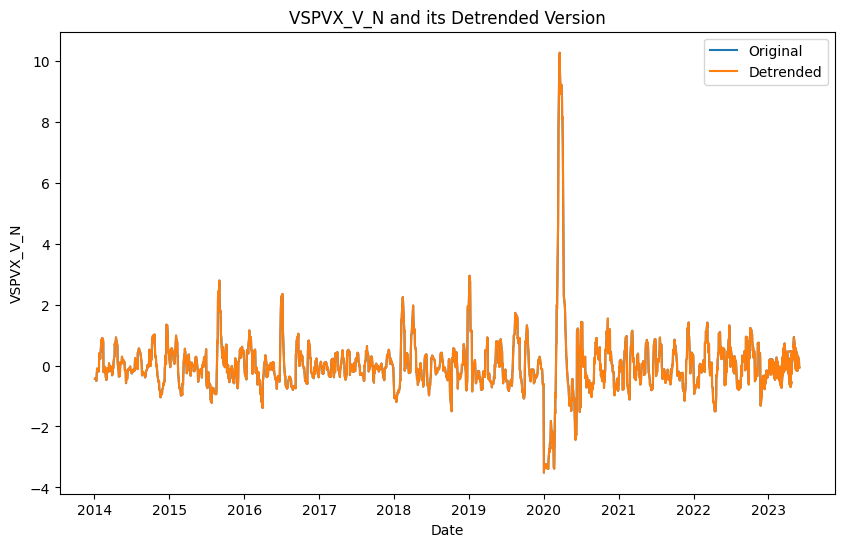

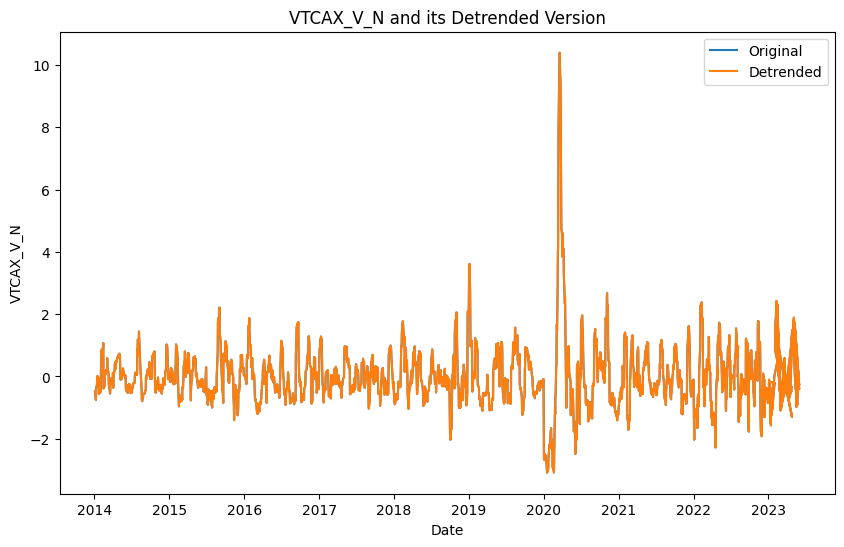

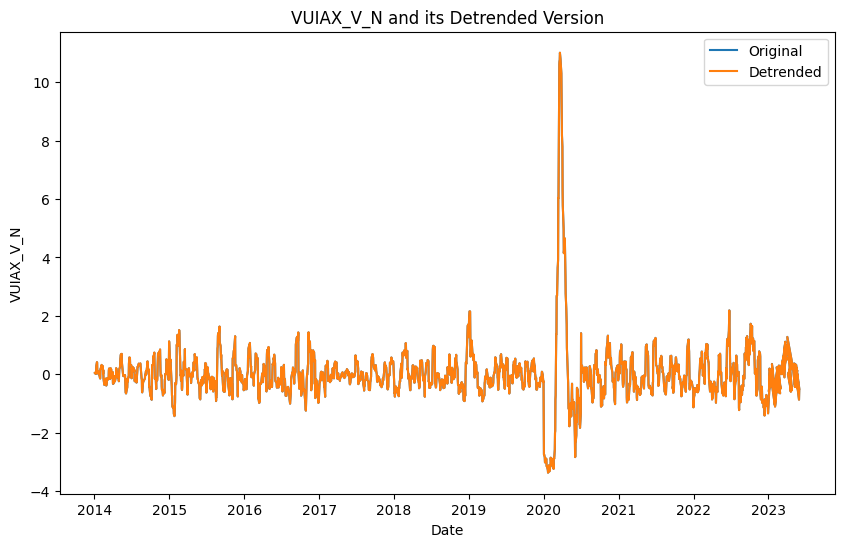

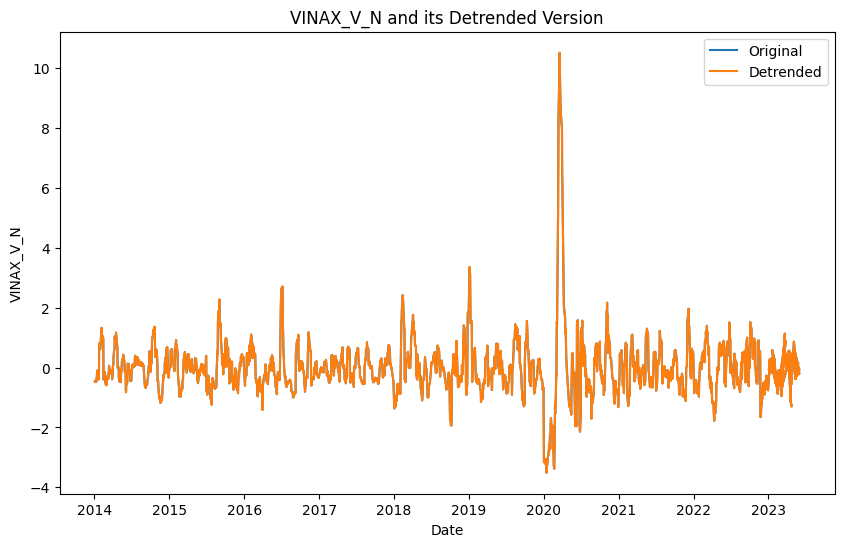

            VUIAX_P_N  VGHCX_P_N  VFAIX_P_N  VSPVX_P_N  VITAX_P_N  VGSLX_P_N  \
date                                                                           
2014-01-03  -0.925157  -1.729626   0.213088   0.301732   0.232477  -1.007201   
2014-01-07  -0.739622  -1.539116   0.238405   0.355916   0.275410  -0.861637   
2014-01-08  -0.851881  -1.121272   0.270197   0.313231   0.270949  -0.934410   
2014-01-10  -0.477743  -0.712581   0.301989   0.356783   0.231381  -0.678617   
2014-01-13  -0.684303  -0.827219   0.100649   0.117999   0.125109  -0.812864   
...               ...        ...        ...        ...        ...        ...   
2023-05-17  -0.967512   0.205964  -0.133811  -0.049056   0.317957  -0.230754   
2023-05-24  -1.466902  -0.332829  -0.477620  -0.589079   0.252059  -0.994576   
2023-05-25  -1.956366  -0.711420  -0.471731  -0.571516   1.502676  -1.003755   
2023-05-26  -1.939581  -0.681113  -0.278042  -0.075517   2.456637  -0.737363   
2023-05-19  -1.198164   0.252431  -0.116

In [6]:
for column in data_affected:
    detrended_column = detrend_linear(data_affected[column])
    data_detrended[column + '_detrended'] = detrended_column

    plt.figure(figsize=(10, 6))
    plt.plot(data_affected[column], label='Original')
    plt.plot(detrended_column, label='Detrended')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} and its Detrended Version')
    plt.legend()
    plt.show()

print(data_affected)
print(data_detrended)

In [9]:
data_detrended.head()

,VUIAX_P_N_detrended,VGHCX_P_N_detrended,VFAIX_P_N_detrended,VSPVX_P_N_detrended,VITAX_P_N_detrended,VGSLX_P_N_detrended,VINAX_P_N_detrended,VTCAX_P_N_detrended,VCSAX_P_N_detrended,VENAX_P_N_detrended,...,VCSAX_V_N_detrended,VENAX_V_N_detrended,VFAIX_V_N_detrended,VGSLX_V_N_detrended,VGHCX_V_N_detrended,VITAX_V_N_detrended,VSPVX_V_N_detrended,VTCAX_V_N_detrended,VUIAX_V_N_detrended,VINAX_V_N_detrended
date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,-0.926273,-1.725074,0.210943,0.299892,0.228727,-1.009090,0.297066,0.276039,0.559358,0.136899,...,-0.392033,-0.094040,-0.647947,-0.021409,-1.199217,-0.173712,-0.427093,-0.481141,0.048272,-0.464371
2014-01-07,-0.740736,-1.534568,0.236262,0.354078,0.271663,-0.863523,0.262586,0.493971,0.595363,0.315794,...,-0.270814,-0.042003,-0.746972,-0.572765,-1.131239,-0.378926,-0.428597,-0.683790,0.015025,-0.423342
2014-01-08,-0.852994,-1.116727,0.268056,0.311395,0.267206,-0.936295,0.251167,0.479990,0.403278,0.167788,...,-0.173046,-0.028754,-0.743311,-0.510226,-0.757275,-0.385772,-0.439142,-0.753382,0.013383,-0.469461
2014-01-10,-0.478855,-0.708041,0.299850,0.354948,0.227641,-0.680500,0.378119,0.161947,0.535588,0.128748,...,-0.191670,-0.128176,-0.739052,-0.228316,-0.717841,-0.346840,-0.501273,-0.350122,0.290145,-0.481321
2014-01-13,-0.685414,-0.822683,0.098512,0.116165,0.121372,-0.814745,0.175618,-0.047871,0.333365,-0.319858,...,-0.162097,0.125862,-0.322652,-0.102576,-0.613449,-0.170368,-0.219465,-0.259670,0.417015,-0.260348


In [10]:
from scipy.stats import pearsonr
list1 = data['compound']
list2 = data_detrended['VUIAX_P_N_detrended']

corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.013


In [7]:
data_seasonal = data_detrended

season_mapping = {
    1: 'winter',
    2: 'winter',
    3: 'winter',
    4: 'spring',
    5: 'spring',
    6: 'spring',
    7: 'summer',
    8: 'summer',
    9: 'summer',
    10: 'fall',
    11: 'fall',
    12: 'fall'
}


detrend_seasonal = lambda column: column - data_seasonal.groupby(['year', 'season'])[column.name].transform('mean')

columns_to_detrend = data_seasonal.columns.difference(['date', 'season', 'year'])
data_seasonal[columns_to_detrend] = data_seasonal[columns_to_detrend].apply(detrend_seasonal)

data_seasonal.to_csv('detrended_final.csv', index=True)
files.download('detrended_final.csv')

for column in data_seasonal.columns:
    if column not in ['season', 'year']:
        plt.figure()
        plt.plot(data_seasonal.index, data_seasonal[column])
        plt.title(f'{column} over time')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Value')
        plt.show()


KeyError: ignored